# Introdução à Ciência de Dados - UFPB
Professor: Yuri Malheiros

## Regressão Linear - Exercício

Utilizando o dataset dos filmes, aplique a regressão linear para predizer o `US Gross` de acordo com o `Production Budget`.

Primeiro carregue os dados:

In [1]:
# Código para carregar os dados aqui

import pandas as pd
import seaborn as sns
sns.set_palette('Set2')

In [2]:
movies_df = pd.read_csv("../../../caiov/ICD/movies.csv")
movies_df = movies_df.drop(["Title","Worldwide Gross","US DVD Sales","Release Date","MPAA Rating","Running Time (min)","Distributor",
               "Source","Major Genre","Creative Type","Director","Rotten Tomatoes Rating","IMDB Rating","IMDB Votes"], axis=1)

In [3]:
movies_df = movies_df.dropna()
movies_df

,US Gross,Production Budget
0,146083.0,8000000.0
1,10876.0,300000.0
2,203134.0,250000.0
3,373615.0,300000.0
4,1009819.0,1000000.0
...,...,...
3196,31452765.0,24000000.0
3197,33080084.0,85000000.0
3198,11989328.0,35000000.0
3199,45575336.0,80000000.0


Visualize os dados com um gráfico de dispersão:

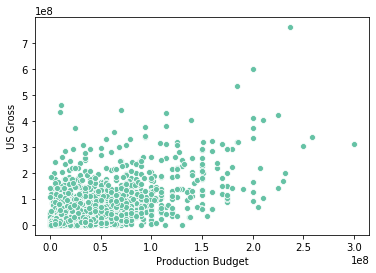

In [4]:
# Código para visualizar os dados aqui

sns.scatterplot(data=movies_df, x="Production Budget", y="US Gross")

Use a regressão linear para encontrar os coeficientes a e b:

In [5]:
# Código da regressão linear aqui

from scipy.stats import linregress
result = linregress(movies_df["Production Budget"], movies_df["US Gross"])

a = result.slope
b = result.intercept

print(f"f(x) = {a}x + {b}")

f(x) = 1.0957226466834862x + 9896486.136543624


Utilize a função `show_regression` abaixo para visualizar o resultado da regressão linear. Nesta função, você deve passar as coordenadas x dos pontos, as coordenadas y, o coeficiente a e o coeficiente b.

In [6]:
#### NÃO ALTERAR ESSE CÓDIGO ####

import matplotlib.pyplot as plt

def gen_line(x_min, x_max, n_points, a, b):
    interval = x_max-x_min
    interval_value = interval/n_points
    
    x_result = []
    y_result = []

    for i in range(n_points):
        current_x = x_min+i*interval_value
        x_result.append(current_x)
        y_result.append(a*current_x + b)
        
    return x_result, y_result

def show_regression(x, y, a, b):
    N = 100

    plt.scatter(x, y)

    line_1 = gen_line(min(x), max(x), N, a, b)
    plt.plot(line_1[0], line_1[1], c= "red")

    plt.gca()
    plt.show()

Exemplo de uso da função:

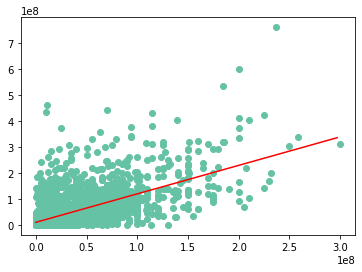

In [7]:
# show_regression(df["Production Budget"], df["US Gross"], a, b)

show_regression(movies_df["Production Budget"], movies_df["US Gross"], a, b)

A função `predict` recebe um production budget de um filme e retorna a predição do US Gross para ele:

In [8]:
def predict(production_budget):
    """
    >>> f'{predict(100000):.2f}'
    '10006058.40'
    
    >>> f'{predict(1000000):.2f}'
    '10992208.78'

    >>> f'{predict(5000000):.2f}'
    '15375099.37'
    """
    # ADICIONE O SEU CÓDIGO AQUI
    
    return a*production_budget + b

## Teste

In [9]:
import doctest

doctest.testmod(verbose=True)

Trying:
    f'{predict(100000):.2f}'
Expecting:
    '10006058.40'
ok
Trying:
    f'{predict(1000000):.2f}'
Expecting:
    '10992208.78'
ok
Trying:
    f'{predict(5000000):.2f}'
Expecting:
    '15375099.37'
ok
3 items had no tests:
    __main__
    __main__.gen_line
    __main__.show_regression
1 items passed all tests:
   3 tests in __main__.predict
3 tests in 4 items.
3 passed and 0 failed.
Test passed.


TestResults(failed=0, attempted=3)